##**PROJECT**
##NAME : JOB ANALYSIS

In [ ]:
#importing all the libraries :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [ ]:
#importing the file :
df = pd.read_csv("/content/Job analysis prediction.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


##**1.DATA CLENZING PROCESS:**


##**Taget column :**
##"SALARY"
The salary column is the taget column in the dataset


In [ ]:
df.nlargest(10, "salary")["salary"]

,salary
3669,30400000
3574,11000000
3646,11000000
3475,8500000
2966,7500000
3476,7000000
3754,7000000
2358,6600000
3192,6000000
1462,5000000


In [ ]:
#Finding the null values :

df.isnull().sum()


,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [ ]:
num = df.select_dtypes(include = ['number']).columns
num

Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio'], dtype='object')

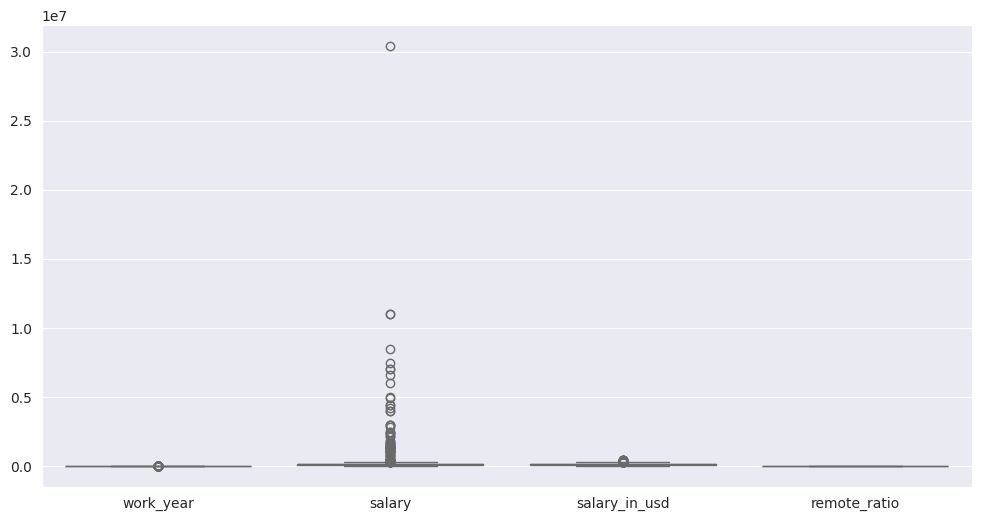

In [ ]:
#finding the null values :

plt.figure(figsize = (12,6))
sns.boxplot(df[['work_year', 'salary', 'salary_in_usd', 'remote_ratio']])
plt.show()

##OBSERVATION :

From this we can see that first 3 columns are having the Outliers and for better results (ie Accuracy )

##OULIERS :
Some of the columns are having the null values('work_year', 'salary', 'salary_in_usd')


In [ ]:
num_cols = ["work_year", "salary", "salary_in_usd"]

for col in num_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  #replace outliers with bounds
  df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
  df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

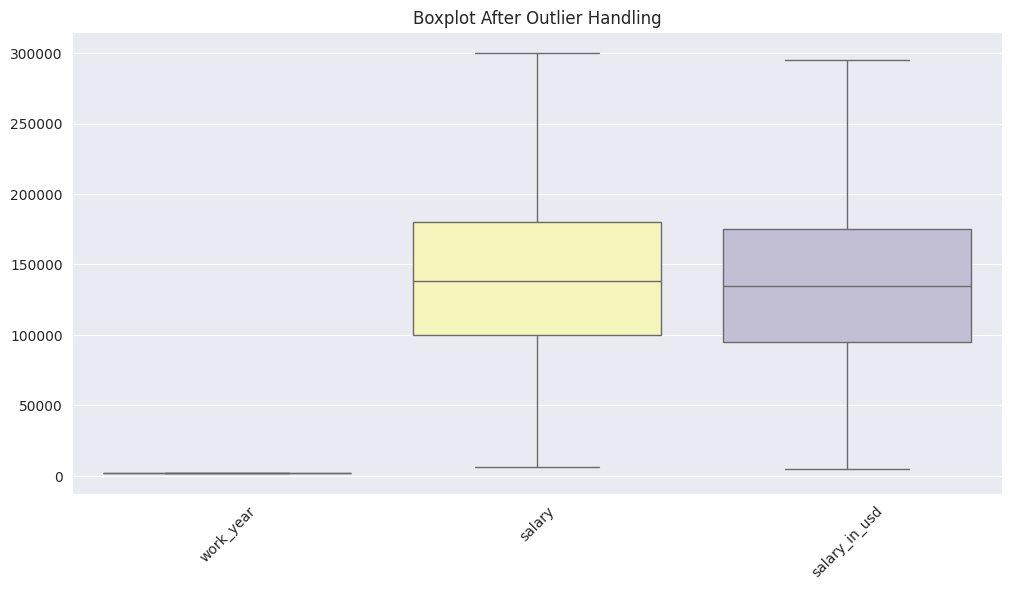

In [ ]:
#After removing the Outliers :

# Replot boxplots after handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplot After Outlier Handling")
plt.show()

##OBSERVATION :

After removing the ouliers

In [ ]:
#Copying the dataframe :

df1 = df.copy()

# VISULLIZATION :

In [ ]:
df1

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023.0,SE,FT,Principal Data Scientist,80000.0,EUR,85847.0,ES,100,ES,L
1,2023.0,MI,CT,ML Engineer,30000.0,USD,30000.0,US,100,US,S
2,2023.0,MI,CT,ML Engineer,25500.0,USD,25500.0,US,100,US,S
3,2023.0,SE,FT,Data Scientist,175000.0,USD,175000.0,CA,100,CA,M
4,2023.0,SE,FT,Data Scientist,120000.0,USD,120000.0,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020.5,SE,FT,Data Scientist,300000.0,USD,295000.0,US,100,US,L
3751,2021.0,MI,FT,Principal Data Scientist,151000.0,USD,151000.0,US,100,US,L
3752,2020.5,EN,FT,Data Scientist,105000.0,USD,105000.0,US,100,US,S
3753,2020.5,EN,CT,Business Data Analyst,100000.0,USD,100000.0,US,100,US,L


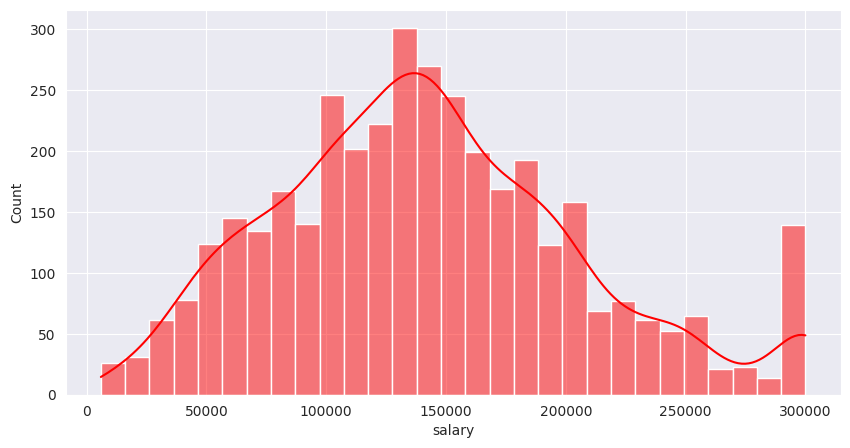

In [ ]:
plt.figure(figsize=(10,5))

sns.histplot(df1["salary"], kde=True, color="red")

plt.show()

In [ ]:
df1["employment_type"].replace(["FT","PT","CT","FL"], ("Full-time", "Part-time", "Contract", "Freelance"), inplace = True)
df1["employment_type"].sample(5)

,employment_type
1556,Full-time
895,Full-time
1397,Full-time
3275,Full-time
1986,Full-time


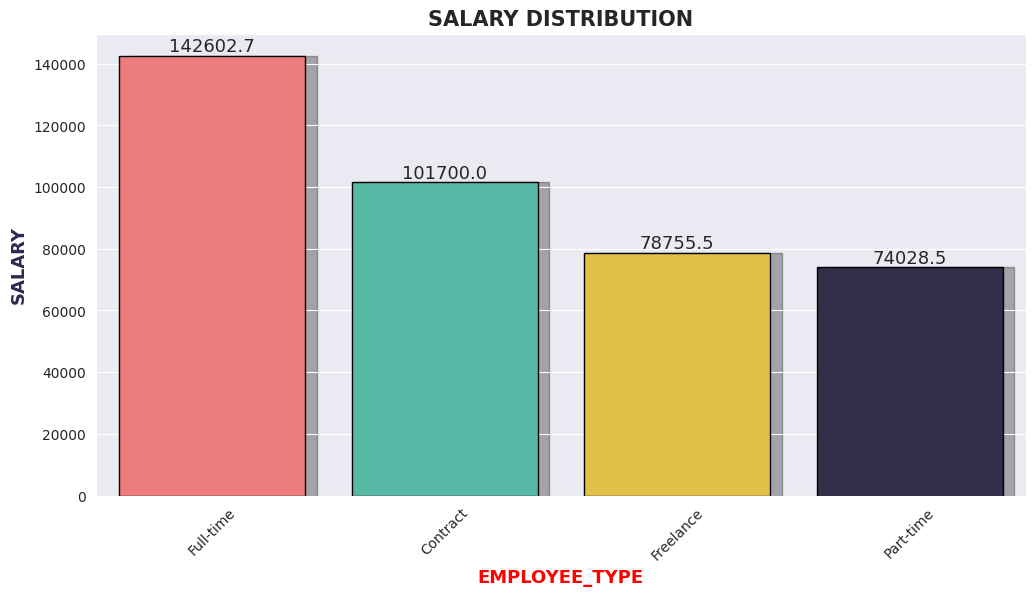

In [ ]:
#BAR-PLOT :

import matplotlib.patches as patches

plt.figure(figsize=(12,6))

x = df1["employment_type"]
y = df1["salary"]

ax = sns.barplot(x = x,
            y = y,
            palette=["#FF6B6B", "#48C9B0", "#FAD02E", "#2E294E"],
            edgecolor="k",
                 ci=None
            )

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
            bar.get_height(),  # Y position (top of bar)
            f'{bar.get_height():.1f}',  # Display value
            ha='center', va='bottom', fontsize=13, fontweight='light')

for bar in ax.patches:
    shadow = patches.Rectangle(
        (bar.get_x() + 0.05, bar.get_y() - 0.05),  # Offset shadow position
        bar.get_width(),  # Same width as bar
        bar.get_height(),  # Same height as bar
        color='k',  # Shadow color
        alpha=0.3,  # Transparency of shadow
        zorder=0  # Ensure shadow is behind bars
    )
    ax.add_patch(shadow)

#labels :

plt.title("SALARY DISTRIBUTION",  fontsize=15, fontweight="bold")
plt.xlabel("EMPLOYEE_TYPE",  fontsize=13, fontweight="bold", color = "red")
plt.ylabel("SALARY",  fontsize=13, fontweight="bold", color = "#2E294E")

plt.xticks(rotation=45)


plt.show()

In [ ]:
#
df1["remote_ratio"].replace([0,50,100],['Onsite','Hybrid','Remote'], inplace=True)
df1["remote_ratio"].value_counts()

,count
remote_ratio,
Onsite,1923
Remote,1643
Hybrid,189


,remote_ratio,proportion
0,Onsite,0.512117
1,Remote,0.437550
2,Hybrid,0.050333


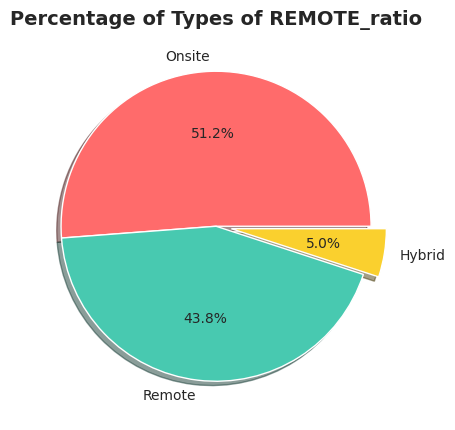

In [ ]:
#Location based Percentage :


y = df1["remote_ratio"].value_counts(normalize= True)

plt.figure(figsize=(5,8))

labels = y.index
sizes = y.values

plt.title("Percentage of Types of REMOTE_ratio", fontsize=14, fontweight="bold" )
colors=["#FF6B6B", "#48C9B0", "#FAD02E"]

plt.pie(sizes, labels= labels, autopct = "%1.1f%%", colors = colors, explode = [0,0,0.1], shadow= True)

display(y.reset_index())

plt.show()

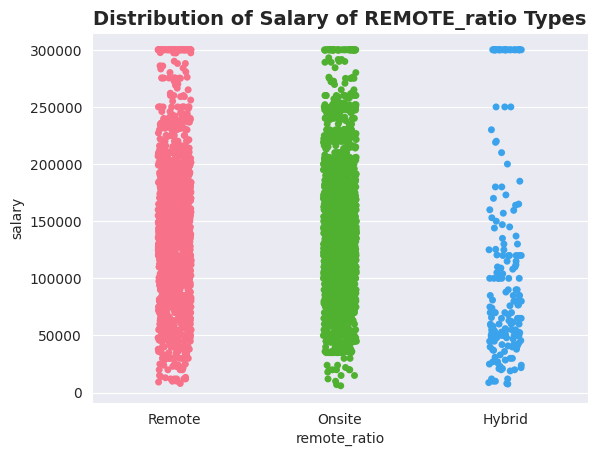

In [ ]:
sns.stripplot(data=df1, x="remote_ratio", y="salary", jitter=True, palette="husl")
plt.title("Distribution of Salary of REMOTE_ratio Types", fontsize=14, fontweight="bold" )

plt.show()

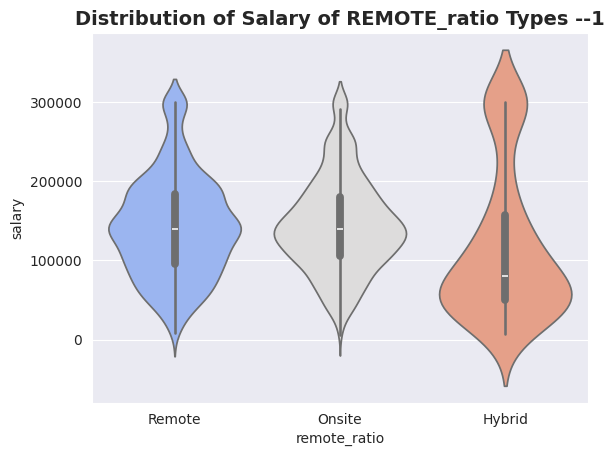

In [ ]:
sns.violinplot(data=df1, x="remote_ratio", y="salary", palette="coolwarm")

plt.title("Distribution of Salary of REMOTE_ratio Types --1", fontsize=14, fontweight="bold" )

plt.show()

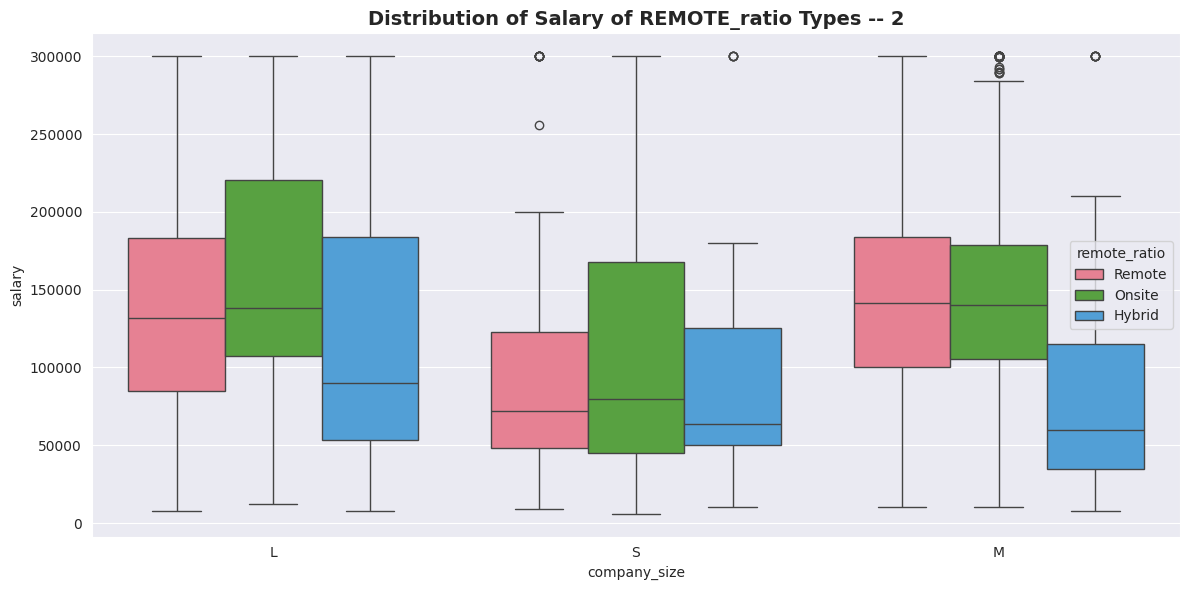

In [ ]:
plt.figure(figsize=(12,6))

sns.boxplot(data=df1,
            x="company_size",     # categorical
            y="salary",           # numerical target
            hue = "remote_ratio",
            palette="husl")

plt.title("Distribution of Salary of REMOTE_ratio Types -- 2", fontsize=14, fontweight="bold" )
plt.tight_layout()
plt.show()

<Axes: xlabel='salary'>

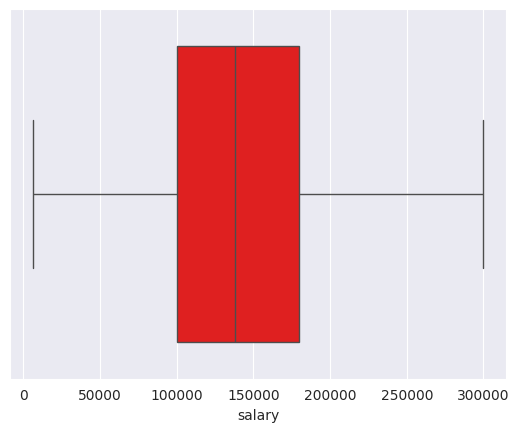

In [ ]:
sns.boxplot(x=df1["salary"], color="red")

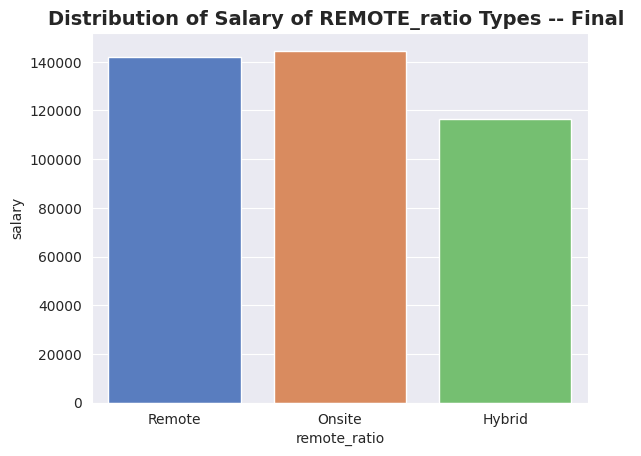

In [ ]:
sns.barplot(data=df1, x="remote_ratio", y="salary", estimator=np.mean, palette="muted", ci= False)

plt.title("Distribution of Salary of REMOTE_ratio Types -- Final ", fontsize=14, fontweight="bold" )

plt.show()

In [ ]:
df1["experience_level"].replace(["SE", "MI", "EN", "EX"],("Senior-level", "Mid-level","Entry-level", "Executive-level"), inplace = True)
df1["experience_level"].sample(5)

,experience_level
1501,Senior-level
896,Mid-level
1965,Senior-level
3686,Mid-level
1759,Senior-level


In [ ]:
y = df1["experience_level"].value_counts()
y.reset_index()

,experience_level,count
0,Senior-level,2516
1,Mid-level,805
2,Entry-level,320
3,Executive-level,114


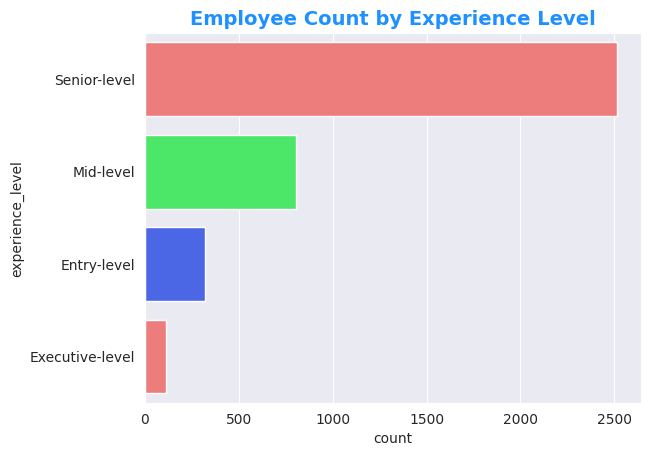

In [ ]:
plt.style.use("dark_background")  # Similar to 'plotly_dark'
sns.set_style("darkgrid")
sns.countplot(df1["experience_level"], palette=["#FF6B6B", "#33FF57", "#3357FF"])

plt.title("Employee Count by Experience Level", fontsize=14, fontweight="bold", color="dodgerblue")

plt.show()

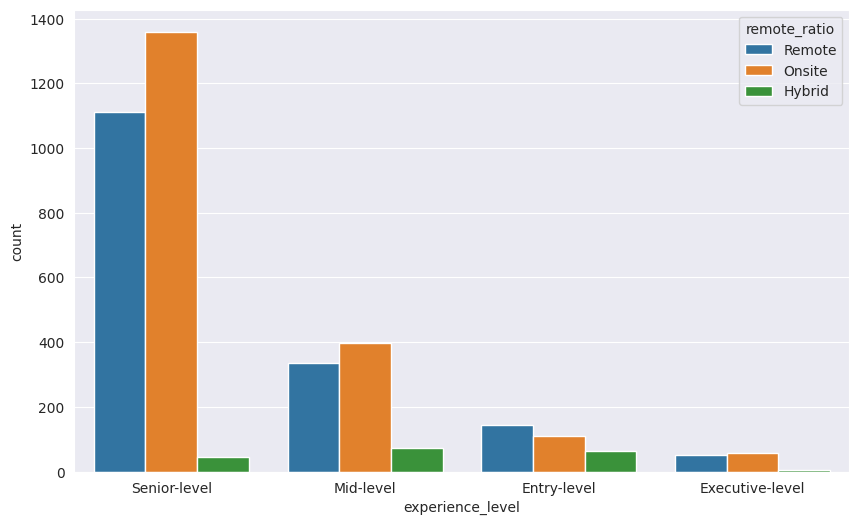

In [ ]:
plt.figure(figsize=(10,6))

plt.style.use("dark_background")  # Similar to 'plotly_dark'
sns.set_style("darkgrid")
sns.countplot(data=df1,
              x="experience_level",
              hue="remote_ratio",
              palette = "tab10",
              )

plt.show()

In [ ]:

import plotly.express as px
plt.figure(figsize=(10,6))

# Create Histogram
fig = px.histogram(df1,
                   x='employment_type',
                   color='work_year',  # Color by work_year
                   barmode='group',  # Grouped bars
                   template='plotly_dark',  # Dark theme
                   title='Count of Employment Type')

fig.show()

<Figure size 1000x600 with 0 Axes>

In [ ]:
df1.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2898,2022.0,Senior-level,Full-time,Analytics Engineer,83376.0,GBP,102663.0,GB,Remote,GB,M
3689,2020.5,Mid-level,Full-time,Product Data Analyst,300000.0,INR,6072.0,IN,Remote,IN,L
2252,2022.0,Senior-level,Full-time,Data Scientist,122600.0,USD,122600.0,US,Onsite,US,M
3613,2020.5,Senior-level,Full-time,Big Data Engineer,85000.0,GBP,109024.0,GB,Hybrid,GB,M
275,2023.0,Executive-level,Full-time,Data Engineer,110000.0,USD,110000.0,US,Onsite,US,M
558,2023.0,Senior-level,Full-time,Data Analyst,106800.0,USD,106800.0,US,Onsite,US,M
1695,2023.0,Senior-level,Full-time,Applied Scientist,72000.0,USD,72000.0,US,Onsite,US,L
512,2023.0,Senior-level,Full-time,Data Engineer,115000.0,USD,115000.0,US,Onsite,US,M
526,2023.0,Senior-level,Full-time,Research Scientist,200000.0,USD,200000.0,US,Onsite,US,M
3292,2022.0,Senior-level,Full-time,Data Engineer,160000.0,USD,160000.0,US,Onsite,US,L


In [ ]:
df1["company_size"].value_counts()

,count
company_size,
M,3153
L,454
S,148


In [ ]:
df1["company_size"].unique()

array(['L', 'S', 'M'], dtype=object)

In [ ]:
df1.company_size.replace(["M", "L", "S"],['Medium','Large','Small'], inplace=True)
df1["company_size"].sample(5)

,company_size
3093,Large
555,Medium
3504,Large
431,Medium
458,Medium



'''plt.style.use("dark_background")  # Similar to 'plotly_dark' sns.set_style("darkgrid")'''

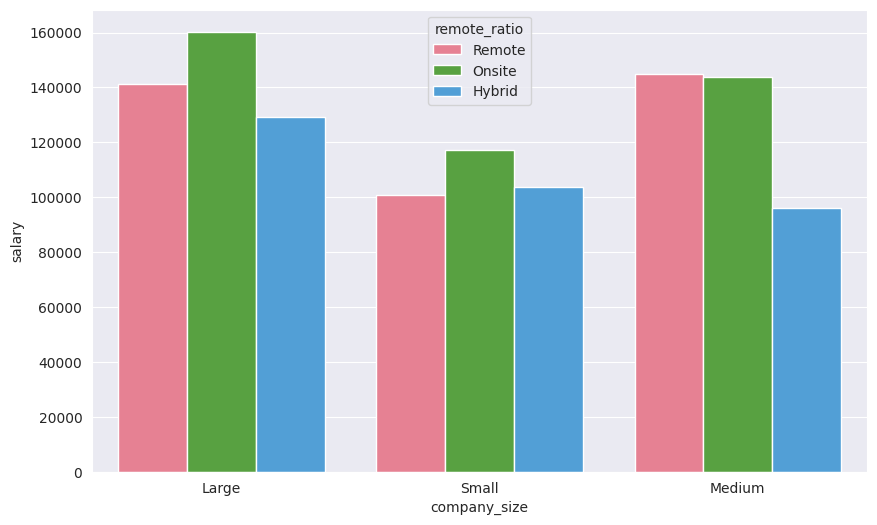

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(data=df1,
              x="company_size",
              y = "salary",
              hue ="remote_ratio",
              palette = "husl",
              ci=None,


              )


plt.show()

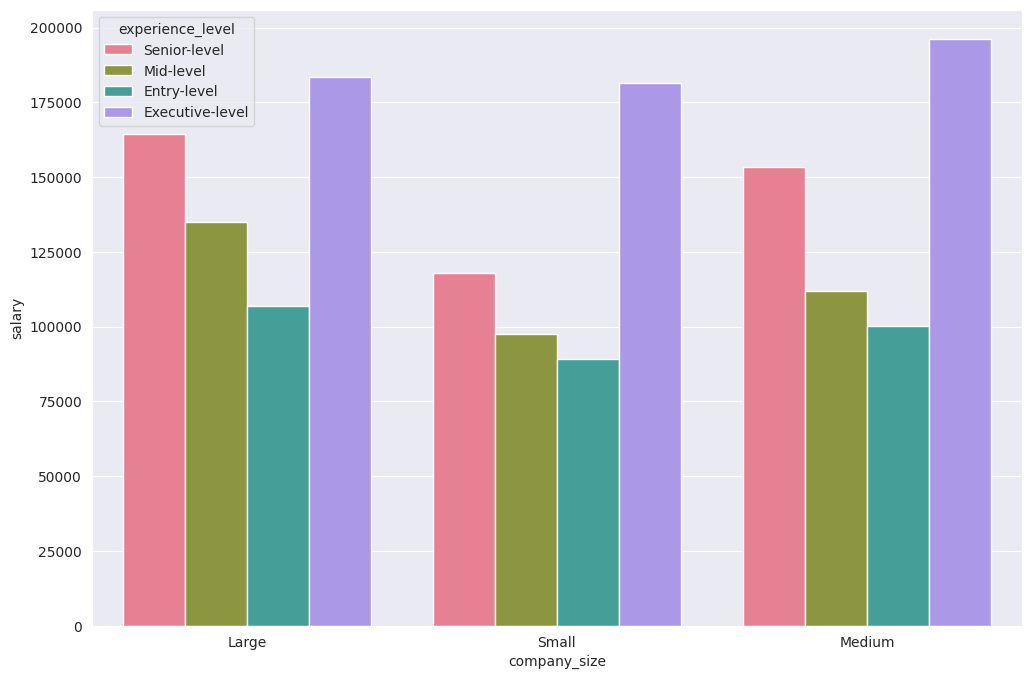

In [ ]:
plt.figure(figsize=(12,8))

sns.barplot(data=df1,
              x="company_size",
              y = "salary",
              hue ="experience_level",
              palette = "husl",
              ci=None,


              )


plt.show()

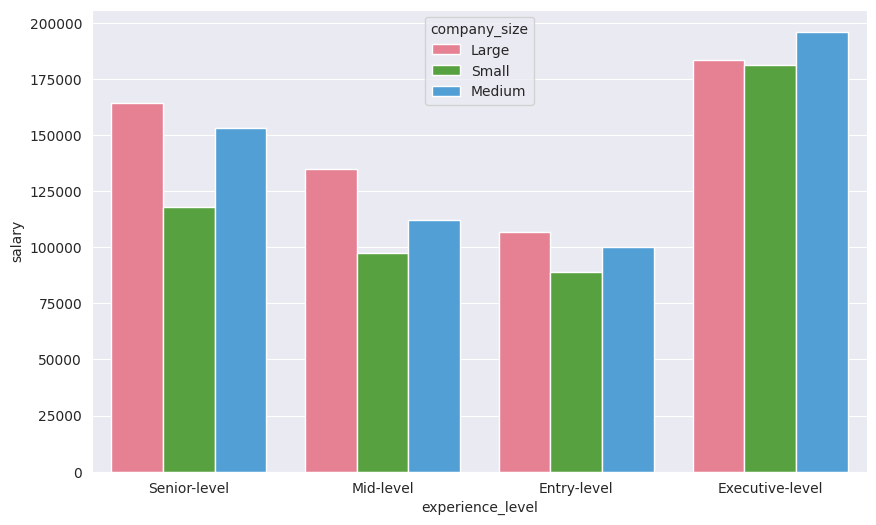

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(data=df1,
              x="experience_level",
              y = "salary",
              hue ="company_size",
              palette = "husl",
              ci=None,


              )


plt.show()

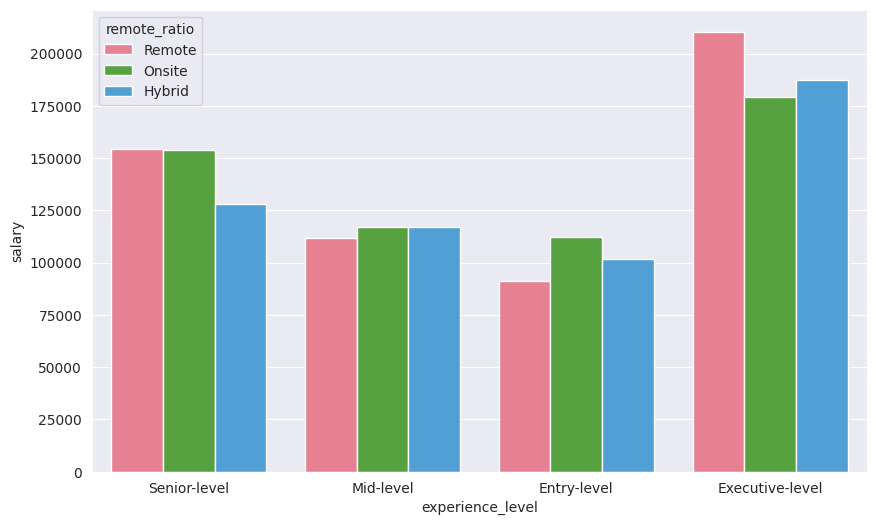

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(data=df1,
              x="experience_level",
              y = "salary",
             hue = "remote_ratio",
              palette = "husl",
              ci=None,


              )


plt.show()

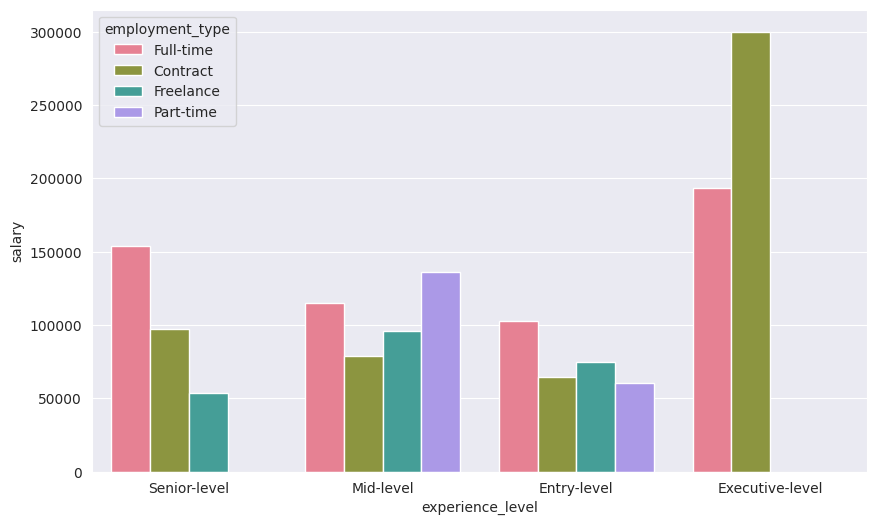

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(data=df1,
              x="experience_level",
              y = "salary",
             hue = "employment_type",
              palette = "husl",
              ci=None,


              )


plt.show()

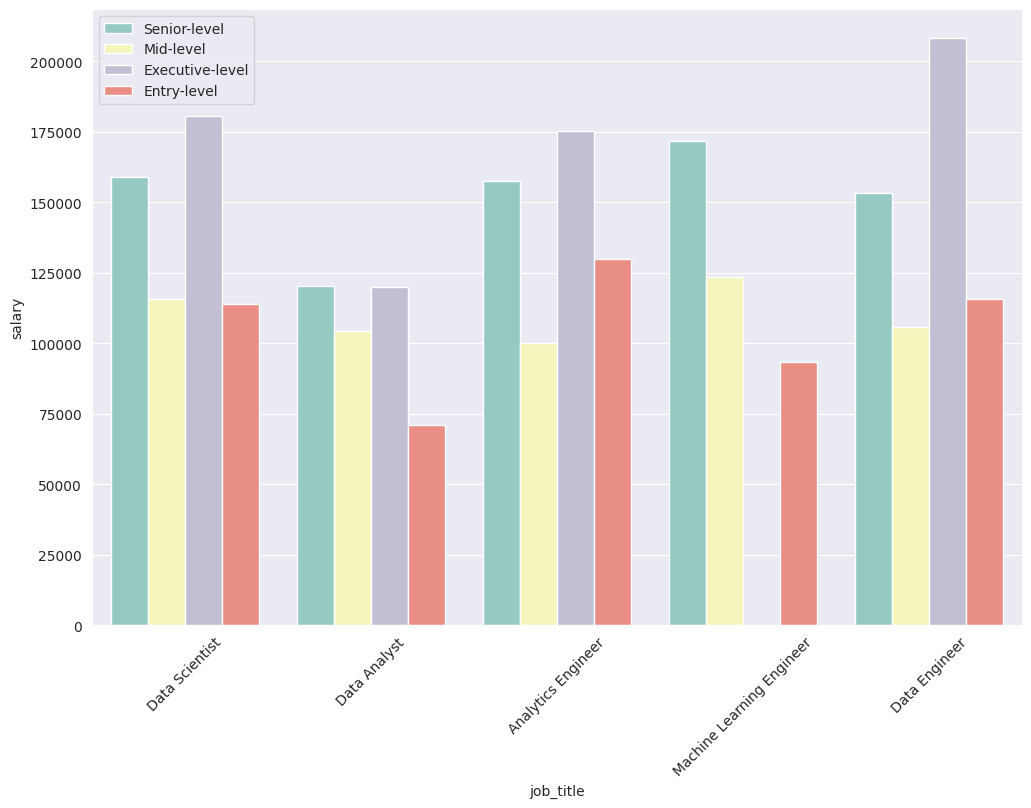

In [ ]:
plt.figure(figsize=(12,8))

top_jobs = df1["job_title"].value_counts().head(5).index

# Filter the DataFrame to include only those top job titles
filtered_df = df1[df1["job_title"].isin(top_jobs)]

# Now plot using Seaborn
sns.barplot(data=filtered_df, x="job_title", y="salary", hue="experience_level", ci = False)

plt.legend(loc='upper left')

plt.xticks(rotation=45)

plt.show()

<Axes: >

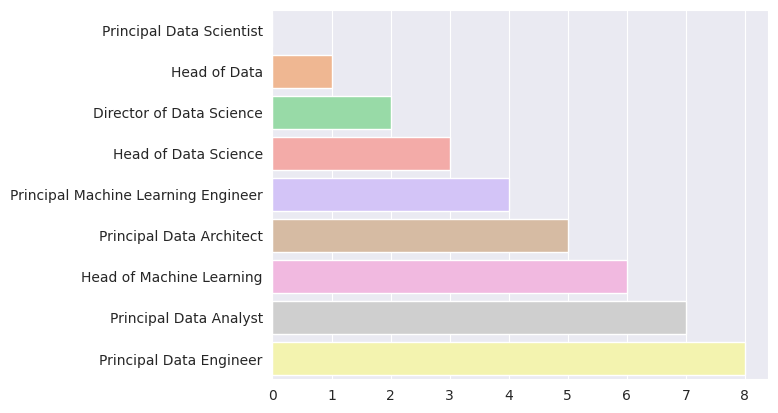

In [ ]:
y = df1[df1["job_title"].str.contains("chief|vp|director|head|principal", case=False, na=False)]["job_title"].unique()
sns.barplot(y, palette="pastel")

<Axes: ylabel='job_title'>

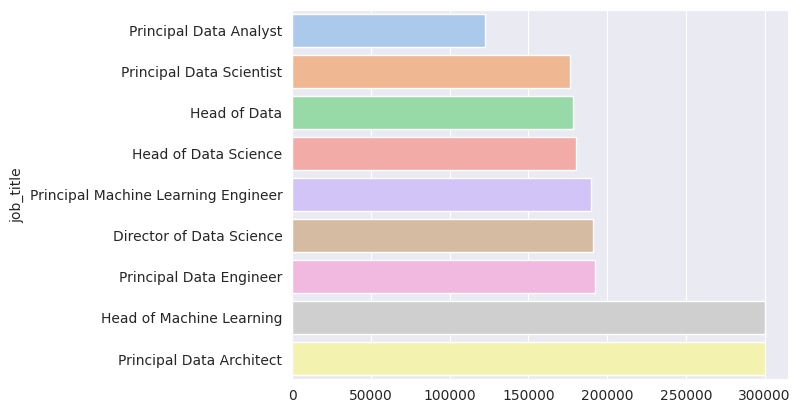

In [ ]:
exec_roles = df1[df1["job_title"].str.contains("chief|vp|director|head|principal", case=False, na=False)]

# Group by job title and calculate average salary
salary_by_role = exec_roles.groupby("job_title")["salary"].mean().sort_values()

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=salary_by_role.values, y=salary_by_role.index, palette="pastel")

In [ ]:
df1.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2066,2022.0,Senior-level,Full-time,Data Scientist,125000.0,USD,125000.0,US,Onsite,US,Medium
1101,2023.0,Senior-level,Full-time,Analytics Engineer,175000.0,USD,175000.0,US,Onsite,US,Medium
1500,2023.0,Senior-level,Full-time,Data Engineer,85000.0,USD,85000.0,US,Remote,US,Medium
1827,2022.0,Senior-level,Full-time,Data Scientist,140000.0,USD,140000.0,US,Onsite,US,Medium
3657,2020.5,Senior-level,Full-time,Lead Data Engineer,125000.0,USD,125000.0,NZ,Hybrid,NZ,Small
147,2023.0,Senior-level,Full-time,Data Engineer,95000.0,USD,95000.0,US,Remote,US,Medium
1555,2023.0,Senior-level,Full-time,Data Engineer,105700.0,USD,105700.0,US,Onsite,US,Large
1083,2023.0,Senior-level,Full-time,Data Engineer,104000.0,USD,104000.0,US,Remote,US,Medium
529,2023.0,Senior-level,Full-time,Machine Learning Engineer,216000.0,USD,216000.0,US,Remote,US,Medium
326,2023.0,Mid-level,Full-time,Machine Learning Engineer,150450.0,USD,150450.0,US,Remote,US,Medium


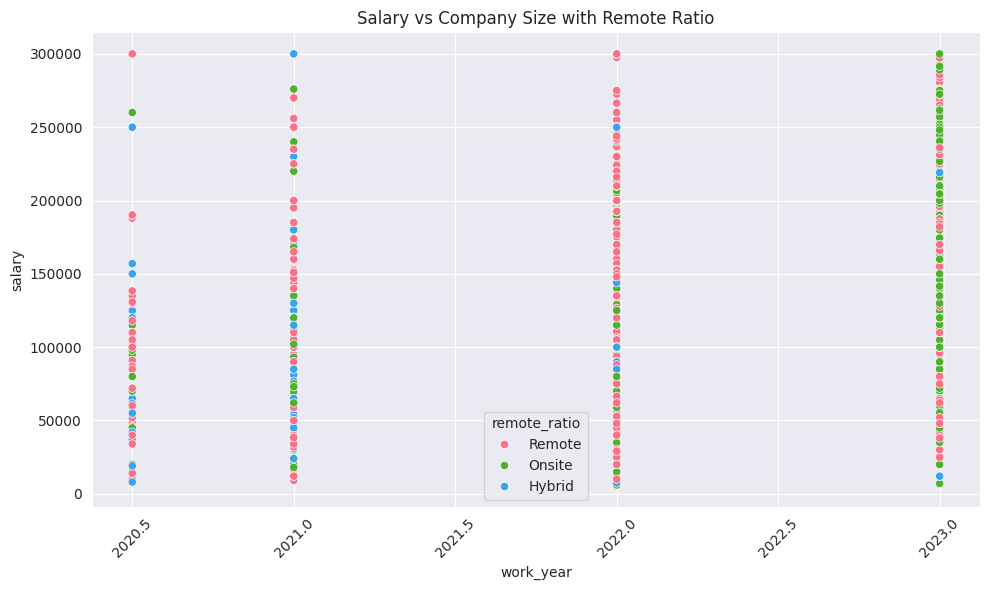

In [ ]:

plt.figure(figsize=(10,6))

sns.scatterplot(data=df1,
                x="work_year",
                y="salary",
                hue="remote_ratio",
                palette="husl")

plt.title("Salary vs Company Size with Remote Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df1.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1483,2023.0,Mid-level,Full-time,Data Analyst,79000.0,USD,79000.0,US,Onsite,US,Medium
2750,2022.0,Senior-level,Full-time,Data Scientist,207000.0,USD,207000.0,US,Remote,US,Medium
3015,2022.0,Senior-level,Full-time,Data Analyst,70000.0,GBP,86193.0,GB,Onsite,GB,Medium
2342,2022.0,Senior-level,Full-time,Data Scientist,205000.0,USD,205000.0,US,Remote,US,Medium
3616,2021.0,Mid-level,Full-time,Data Engineer,110000.0,USD,110000.0,US,Remote,US,Large
3531,2021.0,Senior-level,Full-time,Data Engineer,153000.0,USD,153000.0,US,Remote,US,Large
2035,2022.0,Senior-level,Full-time,Data Engineer,220000.0,USD,220000.0,US,Remote,US,Medium
3019,2022.0,Senior-level,Full-time,Data Engineer,188100.0,USD,188100.0,US,Onsite,US,Medium
2792,2022.0,Senior-level,Full-time,Machine Learning Engineer,195400.0,USD,195400.0,US,Remote,US,Large
1030,2023.0,Senior-level,Full-time,Data Analyst,170500.0,USD,170500.0,US,Remote,US,Medium


In [ ]:
corr = df1.corr(numeric_only=True)

corr

,work_year,salary,salary_in_usd
work_year,1.000000,0.128512,0.239314
salary,0.128512,1.000000,0.811103
salary_in_usd,0.239314,0.811103,1.000000


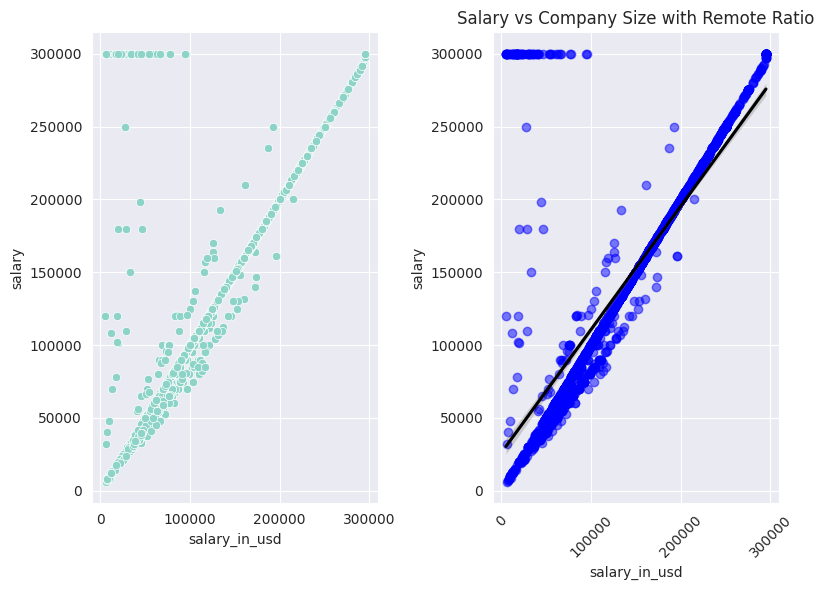

In [ ]:

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)

sns.scatterplot(data=df1,
                x="salary_in_usd",
                y="salary",
                #hue="remote_ratio",

                palette="husl")

plt.subplot(1,3,2)

sns.regplot(data=df1,
            x="salary_in_usd",
            y="salary",
            scatter= True,
            color="black",
            scatter_kws={"alpha": 0.5, "color": "blue"}
            )


plt.title("Salary vs Company Size with Remote Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

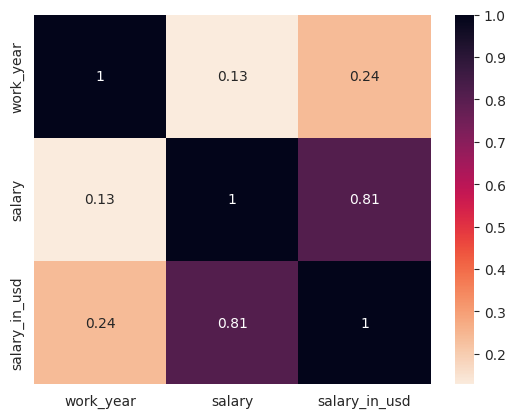

In [ ]:

sns.heatmap(df1.corr(numeric_only=True),cmap="rocket_r", annot=True)

plt.show()

In [ ]:
df1

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023.0,Senior-level,Full-time,Principal Data Scientist,80000.0,EUR,85847.0,ES,Remote,ES,Large
1,2023.0,Mid-level,Contract,ML Engineer,30000.0,USD,30000.0,US,Remote,US,Small
2,2023.0,Mid-level,Contract,ML Engineer,25500.0,USD,25500.0,US,Remote,US,Small
3,2023.0,Senior-level,Full-time,Data Scientist,175000.0,USD,175000.0,CA,Remote,CA,Medium
4,2023.0,Senior-level,Full-time,Data Scientist,120000.0,USD,120000.0,CA,Remote,CA,Medium
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020.5,Senior-level,Full-time,Data Scientist,300000.0,USD,295000.0,US,Remote,US,Large
3751,2021.0,Mid-level,Full-time,Principal Data Scientist,151000.0,USD,151000.0,US,Remote,US,Large
3752,2020.5,Entry-level,Full-time,Data Scientist,105000.0,USD,105000.0,US,Remote,US,Small
3753,2020.5,Entry-level,Contract,Business Data Analyst,100000.0,USD,100000.0,US,Remote,US,Large


In [ ]:
d = df1["company_location"]
d.value_counts()


,count
company_location,
US,3040
GB,172
CA,87
ES,77
IN,58
...,...
CN,1
NZ,1
CL,1


In [ ]:
'''plt.figure(figsize=(12,6))

y = df["company_location"].value_counts().head(10)

sns.barplot(y = y.index, x = y.values, hue = "experience_level",palette="pastel" )

plt.title("Top 10 Company Locations")

plt.show()'''

'plt.figure(figsize=(12,6))\n\ny = df["company_location"].value_counts().head(10)\n\nsns.barplot(y = y.index, x = y.values, hue = "experience_level",palette="pastel" )\n\nplt.title("Top 10 Company Locations")\n\nplt.show()'

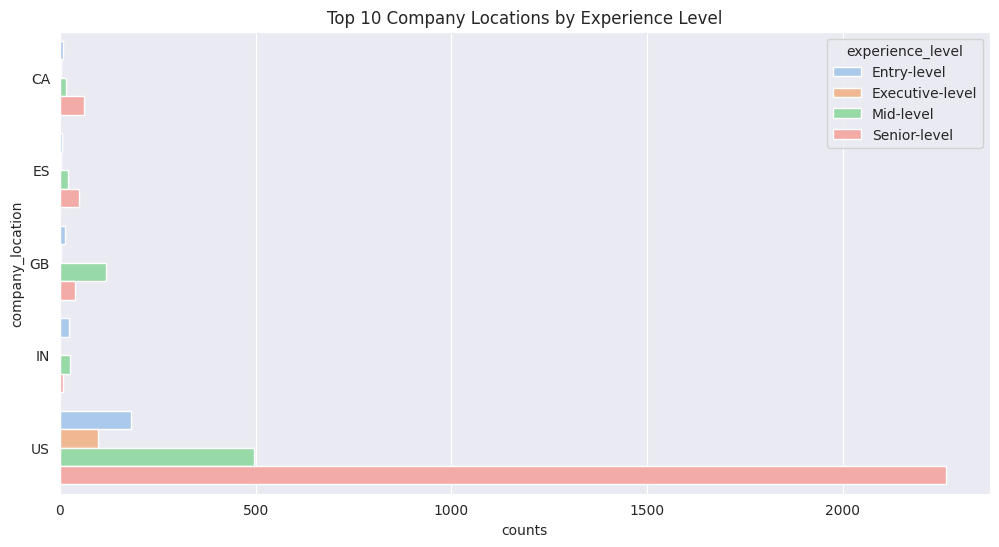

In [ ]:
plt.figure(figsize=(12,6))

# Filter the top 10 locations first
top_locations = df1["company_location"].value_counts().head(5).index

# Create a DataFrame with just these locations
filtered_df1 = df1[df1["company_location"].isin(top_locations)]

# Group by location and experience level, then count
agg_df1 = filtered_df1.groupby(["company_location", "experience_level"]).size().reset_index(name="counts")

sns.barplot(data=agg_df1, y="company_location", x="counts", hue="experience_level", palette="pastel")

plt.title("Top 10 Company Locations by Experience Level")
plt.show()

<Figure size 1200x600 with 0 Axes>

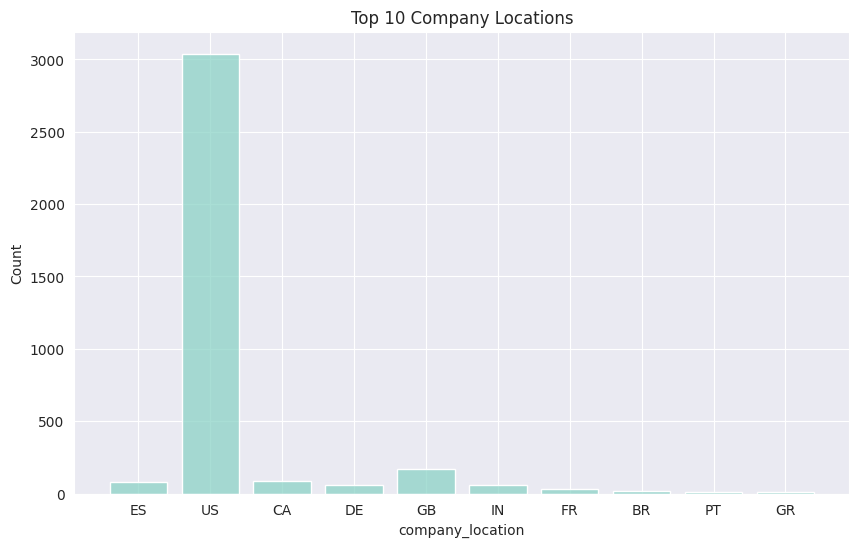

In [ ]:
plt.figure(figsize=(12,6))

top10 = df1["company_location"].value_counts().head(10).index

# Filter dataframe for only top 10 locations
df_top10 = df1[df1["company_location"].isin(top10)]

# Now use histplot — just pass x, not y!
plt.figure(figsize=(10,6))
sns.histplot(data=df_top10, x="company_location", shrink=0.8, palette="pastel")

plt.title("Top 10 Company Locations")

plt.show()

In [ ]:
df2 = df1.copy()

##PREPROCCESSING



In [ ]:
df2["experience_level"].unique()

array(['Senior-level', 'Mid-level', 'Entry-level', 'Executive-level'],
      dtype=object)

##ENCODING


In [ ]:
df2

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023.0,Senior-level,Full-time,Principal Data Scientist,80000.0,EUR,85847.0,ES,Remote,ES,Large
1,2023.0,Mid-level,Contract,ML Engineer,30000.0,USD,30000.0,US,Remote,US,Small
2,2023.0,Mid-level,Contract,ML Engineer,25500.0,USD,25500.0,US,Remote,US,Small
3,2023.0,Senior-level,Full-time,Data Scientist,175000.0,USD,175000.0,CA,Remote,CA,Medium
4,2023.0,Senior-level,Full-time,Data Scientist,120000.0,USD,120000.0,CA,Remote,CA,Medium
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020.5,Senior-level,Full-time,Data Scientist,300000.0,USD,295000.0,US,Remote,US,Large
3751,2021.0,Mid-level,Full-time,Principal Data Scientist,151000.0,USD,151000.0,US,Remote,US,Large
3752,2020.5,Entry-level,Full-time,Data Scientist,105000.0,USD,105000.0,US,Remote,US,Small
3753,2020.5,Entry-level,Contract,Business Data Analyst,100000.0,USD,100000.0,US,Remote,US,Large


**Use Label Encoding for All Categorical Columns**


Why Label Encoding?

It’s simple and works with most machine learning models (especially tree-based models like Random Forest, XGBoost, etc.)

It doesn’t increase dimensionality like One-Hot Encoding.

Can be applied easily across multiple columns using LabelEncoder or OrdinalEncoder.



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original DataFrame
df2_encoded = df2.copy()

# Automatically detect categorical columns
categorical_cols = df2_encoded.select_dtypes(include='object').columns

# Apply Label Encoding to all categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df2_encoded[col] = le.fit_transform(df2_encoded[col])

# Check the result
print(df2_encoded.head())


   work_year  experience_level  employment_type  job_title    salary  \
0     2023.0                 3                2         84   80000.0   
1     2023.0                 2                0         66   30000.0   
2     2023.0                 2                0         66   25500.0   
3     2023.0                 3                2         47  175000.0   
4     2023.0                 3                2         47  120000.0   

   salary_currency  salary_in_usd  employee_residence  remote_ratio  \
0                7        85847.0                  26             2   
1               19        30000.0                  75             2   
2               19        25500.0                  75             2   
3               19       175000.0                  11             2   
4               19       120000.0                  11             2   

   company_location  company_size  
0                25             0  
1                70             2  
2                70             

In [ ]:
df2_encoded

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023.0,3,2,84,80000.0,7,85847.0,26,2,25,0
1,2023.0,2,0,66,30000.0,19,30000.0,75,2,70,2
2,2023.0,2,0,66,25500.0,19,25500.0,75,2,70,2
3,2023.0,3,2,47,175000.0,19,175000.0,11,2,12,1
4,2023.0,3,2,47,120000.0,19,120000.0,11,2,12,1
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020.5,3,2,47,300000.0,19,295000.0,75,2,70,0
3751,2021.0,2,2,84,151000.0,19,151000.0,75,2,70,0
3752,2020.5,0,2,47,105000.0,19,105000.0,75,2,70,2
3753,2020.5,0,0,17,100000.0,19,100000.0,75,2,70,0


In [ ]:
#create instance :

X = df2_encoded.drop("salary_in_usd", axis = 1)
y =df2_encoded["salary_in_usd"]

In [ ]:
#importing the all libs :

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#spliting the data:

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size= 0.25, random_state= 150)

# Step 4: Check imbalance in the salary categories

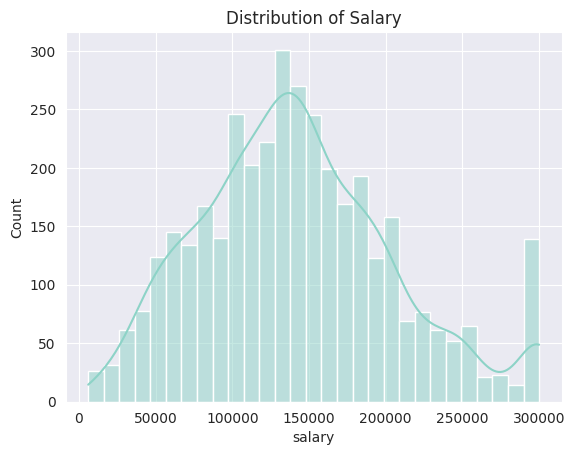

In [ ]:
#Checking the Imbalancing of Target column
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df2['salary'], kde=True)
plt.title("Distribution of Salary")
plt.show()

In [ ]:
#checking throught the value
display(df2['salary'].describe())
display("Skewness:", df2['salary'].skew())

,salary
count,3755.000000
mean,142013.324900
std,63753.652491
min,6000.000000
25%,100000.000000
50%,138000.000000
75%,180000.000000
max,300000.000000


'Skewness:'

np.float64(0.4551108220708124)

✅ Is 0.455 OK for Modeling?
Yes – For most models (like linear regression, decision trees, or ensemble methods like RandomForest or XGBoost), a skew of 0.4–0.5 is quite normal and doesn’t need fixing.

No immediate transformation is required unless:

You observe poor performance

You are using models that are sensitive to distributional assumptions (like Linear or Ridge regression)

In [ ]:
#scalling :
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#1linear Regression :

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predicion :

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
#prediction:

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# MAE and R² score
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")

Train RMSE: 33127.00344795144
Test RMSE: 29527.483709683504
MAE: 17894.90487425692
R² Score: 0.7651470959070842


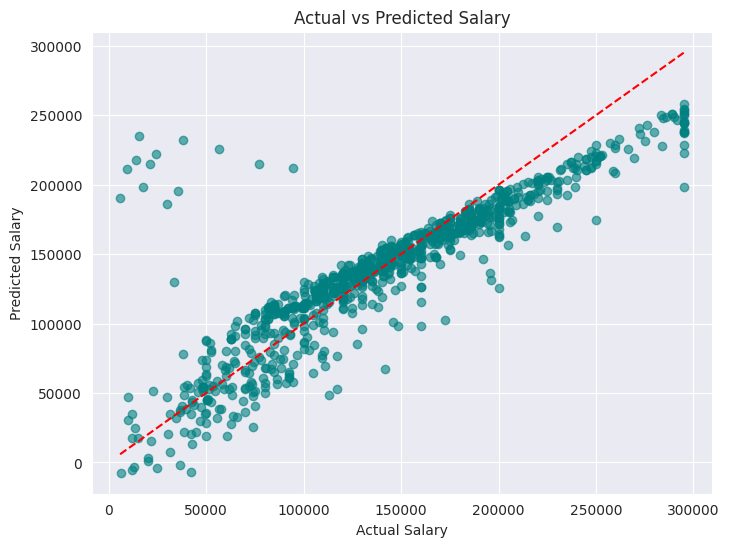

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
rmse = np.sqrt(1293638143.14)
print(rmse)  # ≈ 35,971.13

35967.18147339321


In [ ]:
y_predict_test=model.predict(X_test)
y_predict_test

array([ 73546., 145000.,  80000., 145000., 143860., 140000., 142200.,
       160000., 121523., 204500., 160000., 100000., 100000., 160000.,
       141525., 200000.,  37824., 120000., 160000., 141525., 130000.,
       100000., 185900., 145000., 141525.,  72914., 150000.,  73546.,
       120000., 150000., 150000., 120000., 250000., 150000., 145000.,
       180000., 130000., 175000., 120000., 185900.,  28399., 130000.,
        72914., 120000.,  70000., 120000., 100000., 258000., 100000.,
       100000., 145000., 185900., 130000., 120000.,  92350., 100000.,
       100000., 120000., 150000., 130000., 100000.,  73742.,  38631.,
        31520., 150000., 117104., 160000.,  54094., 120000.,  70000.,
       100000., 130000., 204500., 204500., 204500., 120000.,  38631.,
       180000., 160000., 150000., 150000., 100000., 145000., 160000.,
        25500., 191475.,  50000., 120000., 250000., 120000., 142200.,
        62726., 200000., 295000., 200000.,  70000., 129300.,  75000.,
       145000., 1500

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict_test)

0.10117145899893504

In [ ]:
#2. Decision Tree Classification :

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize regressor
reg_model = DecisionTreeRegressor(criterion='squared_error', max_depth=3, random_state=0)

# Fit the model
reg_model.fit(X_train, y_train)

# Make predictions
y_pred = reg_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 19780.35
MAE: 14371.02
R² Score: 0.8982


RMSE: 19659.69
MAE: 14865.81
R² Score: 0.8959


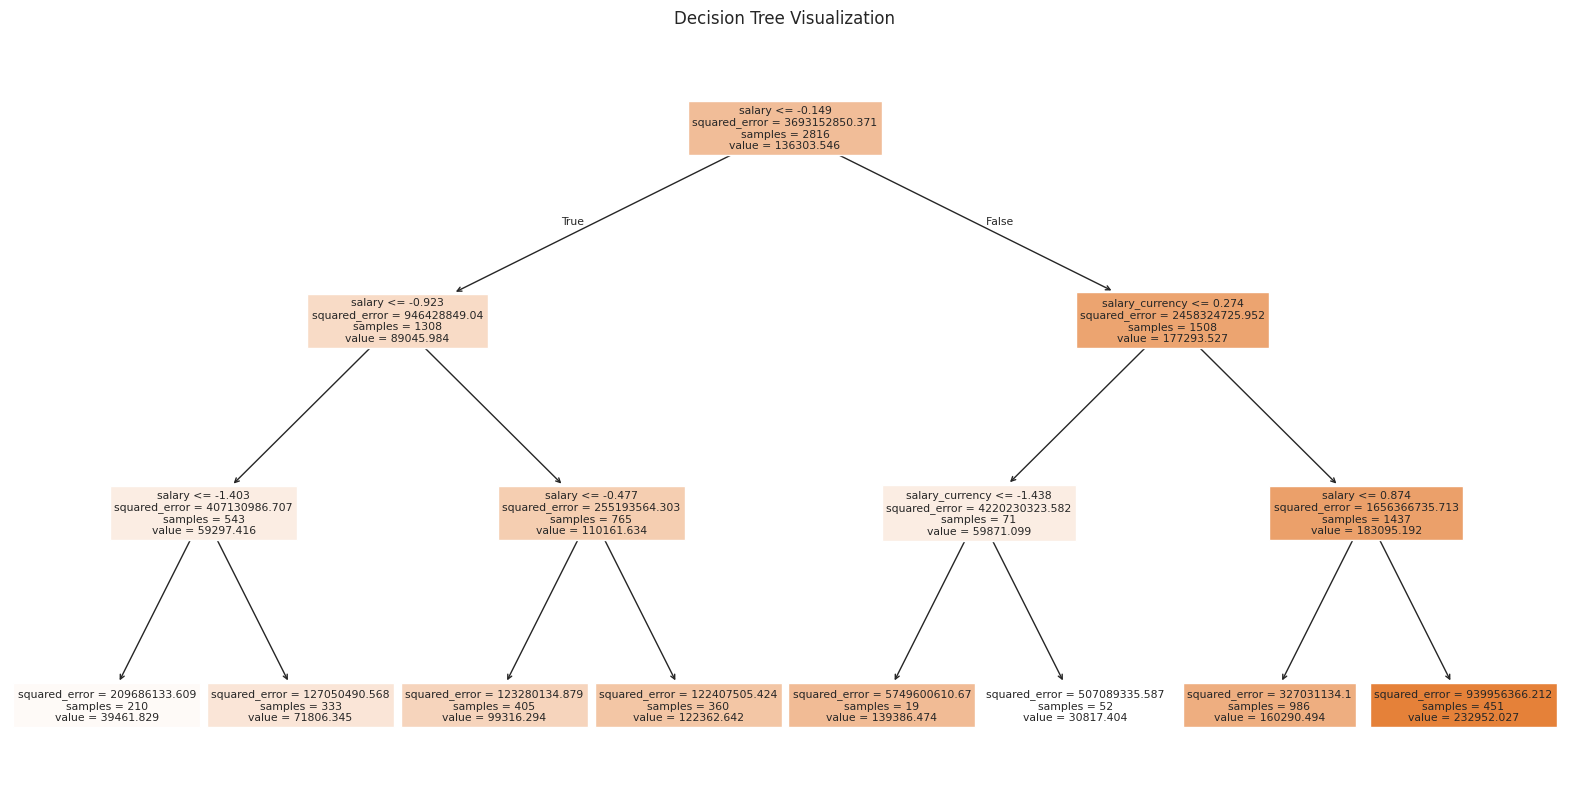

In [ ]:
#ploting :

from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(reg_model, filled=True, feature_names=X.columns, max_depth=3)  # Limit depth for readability
plt.title('Decision Tree Visualization')
plt.show()

In [ ]:
df2["salary"].describe()

,salary
count,3755.000000
mean,142013.324900
std,63753.652491
min,6000.000000
25%,100000.000000
50%,138000.000000
75%,180000.000000
max,300000.000000


In [ ]:
#3Random forest :

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth = 5, min_samples_split =5, random_state=0)

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_split=5, random_state=0)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_pred)
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"R2 :{r2}")

Train RMSE: 33127.00344795144
Test RMSE: 29527.483709683504
R2 :0.9921688496095921


In [ ]:
#4Grandent Boosting:

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

In [ ]:
# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" RMSE: {rmse:.2f}")
print(f" MAE: {mae:.2f}")
print(f" R² Score: {r2:.4f}")

 RMSE: 5391.89
 MAE: 1747.37
 R² Score: 0.9922


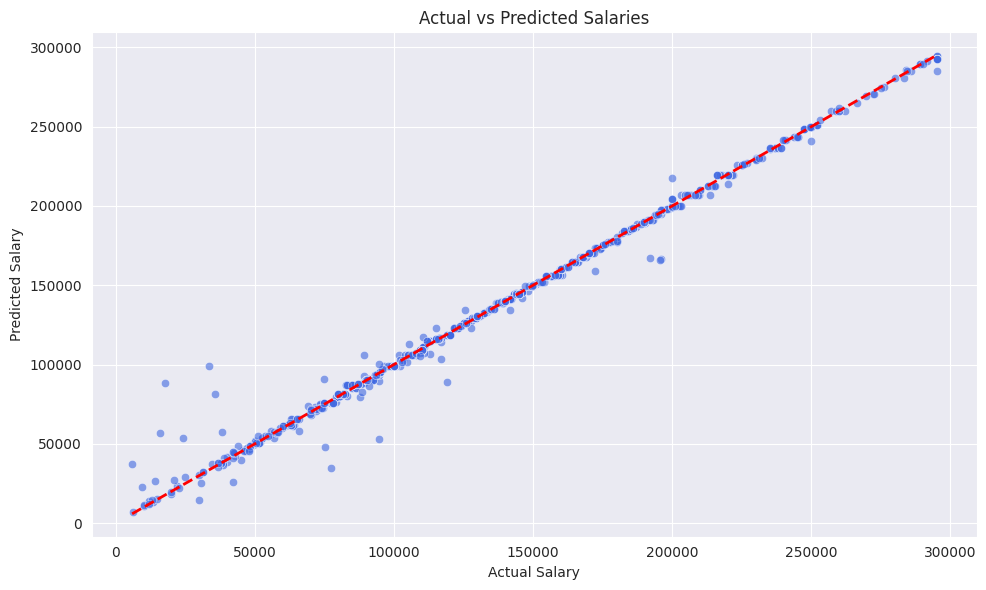

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salaries")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#5Ada-Boost:

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Base learner (you can tune its depth)
base_estimator = DecisionTreeRegressor(max_depth=4)

# Create AdaBoost model
ada_model = AdaBoostRegressor(base_estimator, n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
ada_model.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  learning_rate=0.1, n_estimators=100, random_state=42)

In [ ]:
#prediction:

y_pred_ada = ada_model.predict(X_test)

In [ ]:
rmse_ada = np.sqrt(mean_squared_error(y_test, y_pred_ada))
mae_ada = mean_absolute_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)

print(f" AdaBoost RMSE: {rmse_ada:.2f}")
print(f" AdaBoost MAE: {mae_ada:.2f}")
print(f" AdaBoost R² Score: {r2_ada:.4f}")

 AdaBoost RMSE: 9812.94
 AdaBoost MAE: 6540.11
 AdaBoost R² Score: 0.9741


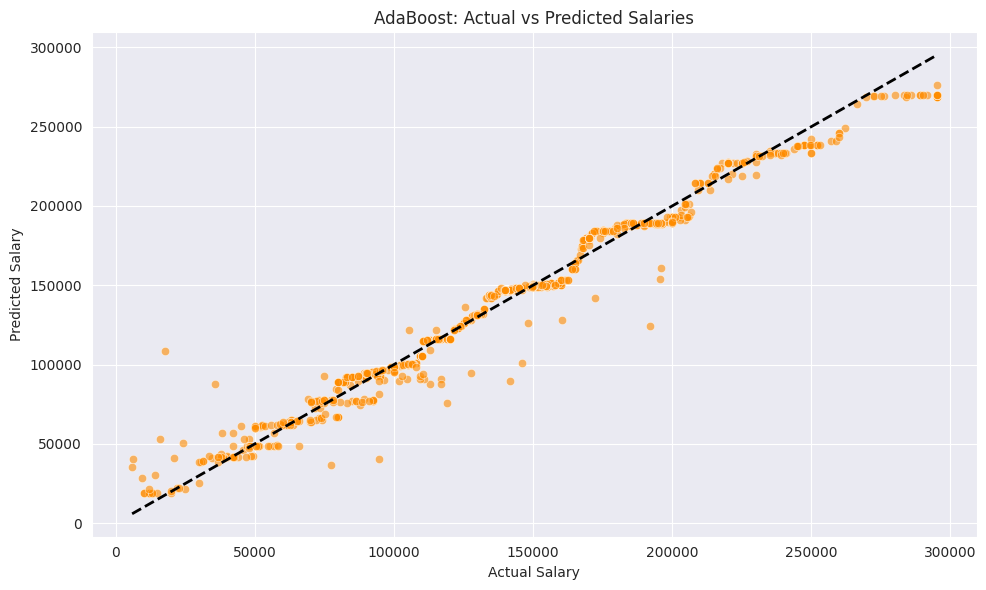

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_ada, color='darkorange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("AdaBoost: Actual vs Predicted Salaries")
plt.grid(True)
plt.tight_layout()
plt.show()

 Summary:
AdaBoost is doing well, but it's not outperforming Gradient Boosting in your case.

RMSE and MAE are higher, and R² is slightly lower.

This may be because AdaBoost is more sensitive to outliers, or your data favors boosting with a lower learning rate & deeper trees, which Gradient Boosting handles better.

In [ ]:
#6Xgboost :
from xgboost import XGBRegressor

# Initialize the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f" XGBoost RMSE: {rmse_xgb:.2f}")
print(f" XGBoost MAE: {mae_xgb:.2f}")
print(f" XGBoost R² Score: {r2_xgb:.4f}")

 XGBoost RMSE: 6033.64
 XGBoost MAE: 1482.93
 XGBoost R² Score: 0.9902


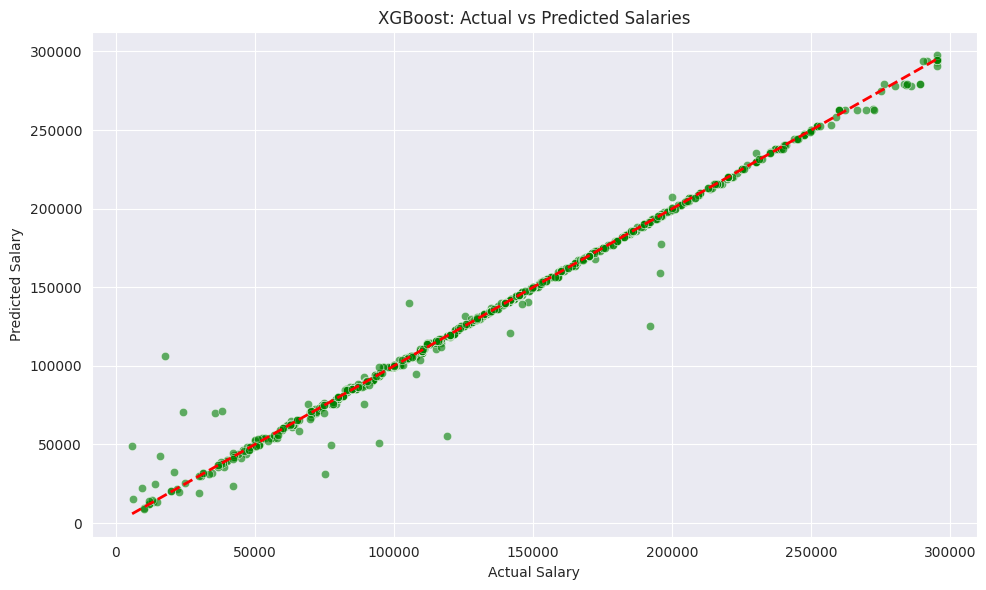

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("XGBoost: Actual vs Predicted Salaries")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Create a dictionary of the results
results = {
    "Model": ["Gradient Boost", "XGBoost", "AdaBoost"],
    "RMSE": [5391.89, 6033.64, 9812.94],
    "MAE": [1747.37, 1482.93, 6540.11],
    "R² Score": [0.9922, 0.9902, 0.9741]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
display(results_df)



,Model,RMSE,MAE,R² Score
0,Gradient Boost,5391.89,1747.37,0.9922
1,XGBoost,6033.64,1482.93,0.9902
2,AdaBoost,9812.94,6540.11,0.9741


In [ ]:

# Create a dictionary of the results
results = {
    "Model": ["LinearRegression","DecisionTreeRegressor","RandomForestRegressor","Gradient Boost", "XGBoost", "AdaBoost"],
    "RMSE": [29527.48,19659.69, 33127.00,5391.89, 6033.64, 9812.94],
    "MAE": [17894.90,14865.81,29527.48,1747.37, 1482.93, 6540.11],
    "R² Score": [0.7651,0.8959 ,0.9921,0.9922, 0.9902, 0.9741]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
display (results_df)

,Model,RMSE,MAE,R² Score
0,LinearRegression,29527.48,17894.90,0.7651
1,DecisionTreeRegressor,19659.69,14865.81,0.8959
2,RandomForestRegressor,33127.00,29527.48,0.9921
3,Gradient Boost,5391.89,1747.37,0.9922
4,XGBoost,6033.64,1482.93,0.9902
5,AdaBoost,9812.94,6540.11,0.9741
